# 0 - Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 1 - Load file

In [4]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Check dataset

In [5]:
# Check data size
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

2240 rows, 29 columns


In [6]:
# Value type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Check null
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
## Check duplicates
df.duplicated().sum()

0

# 2 - Data Preparation

## Drop null rows

In [9]:
df.dropna(inplace= True)

## Type Casting

In [10]:
# Convert Dt_Customer to datetime value
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())

2012-07-30 00:00:00
2014-06-29 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

## Define `last_day`, `age`, `lifespan_months`

Because we cannot define the last day of the dataset, so it is assumed that:
- last_day = max(Dt_customer + Recency)

In [12]:
# Calculate last day
last_date = df.apply(lambda row: row['Dt_Customer'] + pd.DateOffset(days=row['Recency']), axis=1).max()
print(last_date)

2014-10-04 00:00:00


In [13]:
# Add customer's age
df['Age'] = 2014 - df['Year_Birth']

We want to know how long customer has been with us, so we calculate
- lifespan_months = (last_date - Dt_Customer) / 30

In [14]:
df['lifespan_months'] = (last_date - df['Dt_Customer']).dt.days // 30

## Clean `Marital_Status`, `Children` and define `Family_size`

In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Martial status dont need to have that much categories, we can just combine them into `Single` and `Couple`

In [16]:
clean_marital_status = {
    'Married':  'Couple',
    'Together': 'Couple',
    'Single':   'Single',
    'Divorced': 'Single',
    'Widow':    'Single',
    'Alone':    'Single',
    'Absurd':   'Single',
    'YOLO':     'Single'
}
df['Marital_Status'] = df['Marital_Status'].replace(clean_marital_status)

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Couple    1430
Single     786
Name: count, dtype: int64

In [18]:
df[['Kidhome','Teenhome']].head(3)

,Kidhome,Teenhome
0,0,0
1,1,1
2,0,0


We can comebine `Kidhome` and `Teenhome` and define as number of `Children`

In [19]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [20]:
df['Children'].value_counts()

Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

`Family_size` is assumed to be customer's status (1 if Single, 2 if Couple) + number of `Children`

In [21]:
df['Family_size'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Single' else 2) + df['Children']

In [22]:
df['Family_size'].value_counts()

Family_size
3    880
2    757
4    296
1    252
5     31
Name: count, dtype: int64

## Clean `Education` column

In [23]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Education can also be grouped into: `Undergraduate` and `Postgraduate`

In [24]:
clean_education = {
    'Graduation':   'Postgraduate',
    'PhD':          'Postgraduate',
    'Master':       'Postgraduate',
    'Basic':        'Undergraduate',
    '2n Cycle':     'Undergraduate'
}
df['Education'] = df['Education'].replace(clean_education)

In [25]:
df['Education'].value_counts()

Education
Postgraduate     1962
Undergraduate     254
Name: count, dtype: int64

## Define `Frequency` column

In [26]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].head(3)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10


We can comebine the times people made purchases through `Web`, `Catalog`, `Store` into one column `Frequency`

In [27]:
df['Frequency'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

## Define `Monetary` column

In [28]:
df[["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds"]].head(3)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42


We combine all the amount spent for each product into 1 column `Amount_spent`

In [29]:
df['Monetary'] = df[["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

## Define `Responder` column

In [30]:
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].head(3)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0


There are 6 columns on Customer accepted the offer in the promotion campaign. We can combine them together, then segment as below:
- Accepted 4 to 6 offers: High responder
- Accepted 1 to 3 offers: Low responder
- Not accepted any offers: Non-responder

In [31]:
# Calculate sum promotion accepted
df['PromoAccepted'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

# Responder segments
df['Responder'] = 'None'
df.loc[df['PromoAccepted'].between(1,3), 'Responder'] = 'Low'
df.loc[df['PromoAccepted'] >= 4, 'Responder'] = 'High'

In [32]:
df.groupby(['Responder','PromoAccepted'])['ID'].count()

Responder  PromoAccepted
High       4                  36
           5                  10
Low        1                 369
           2                 139
           3                  51
None       0                1611
Name: ID, dtype: int64

## Output cleaned data

In [33]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,lifespan_months,Children,Family_size,Frequency,Monetary,PromoAccepted,Responder
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,25,0,1,22,1617,1,Low
1,2174,1954,Postgraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,7,2,3,4,27,0,None
2,4141,1965,Postgraduate,Couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,13,0,2,20,776,0,None


In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'lifespan_months', 'Children', 'Family_size', 'Frequency',
       'Monetary', 'PromoAccepted', 'Responder'],
      dtype='object')

In [77]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,lifespan_months,Children,Family_size,Frequency,Monetary,PromoAccepted,Responder
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,25,0,1,22,1617,1,Low
1,2174,1954,Postgraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,7,2,3,4,27,0,None
2,4141,1965,Postgraduate,Couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,13,0,2,20,776,0,None
3,6182,1984,Postgraduate,Couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,7,1,3,6,53,0,None
4,5324,1981,Postgraduate,Couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,8,1,3,14,422,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Postgraduate,Couple,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,15,1,3,16,1341,0,None
2236,4001,1946,Postgraduate,Couple,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,3,3,5,15,444,1,Low
2237,7270,1981,Postgraduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,8,0,1,18,1241,1,Low
2238,8235,1956,Postgraduate,Couple,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,8,1,3,21,843,0,None


In [82]:
# Create a new DataFrame with dates from min to max Dt_Customer
min_date = df['Dt_Customer'].min()
max_date = df['Dt_Customer'].max()
date_range = pd.date_range(min_date, max_date, freq='D')

# Create user_count DataFrame
user_count = pd.DataFrame({
    'Date': date_range,
    'UserCount': [df[df['Dt_Customer'] <= date]['ID'].nunique() for date in date_range]
})

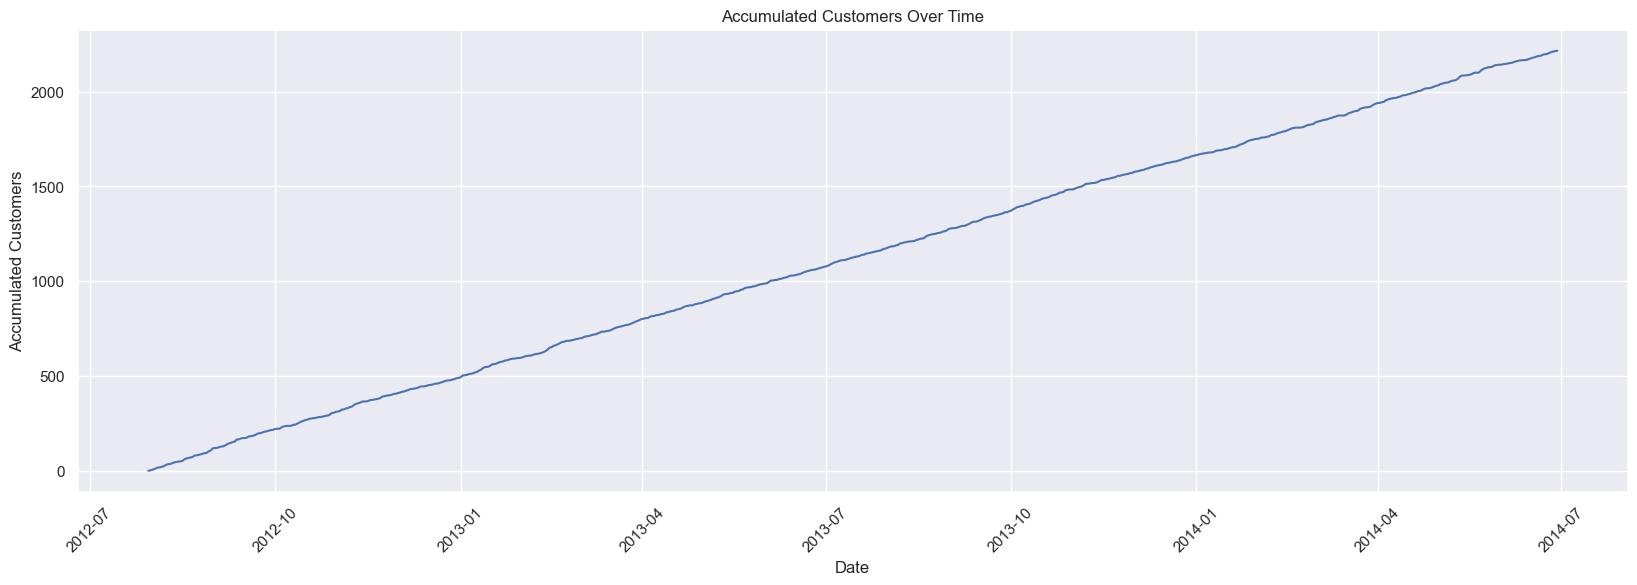

In [88]:
plt.figure(figsize=(20, 6))
plt.plot(user_count['Date'], user_count['UserCount'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Accumulated Customers')
plt.title('Accumulated Customers Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

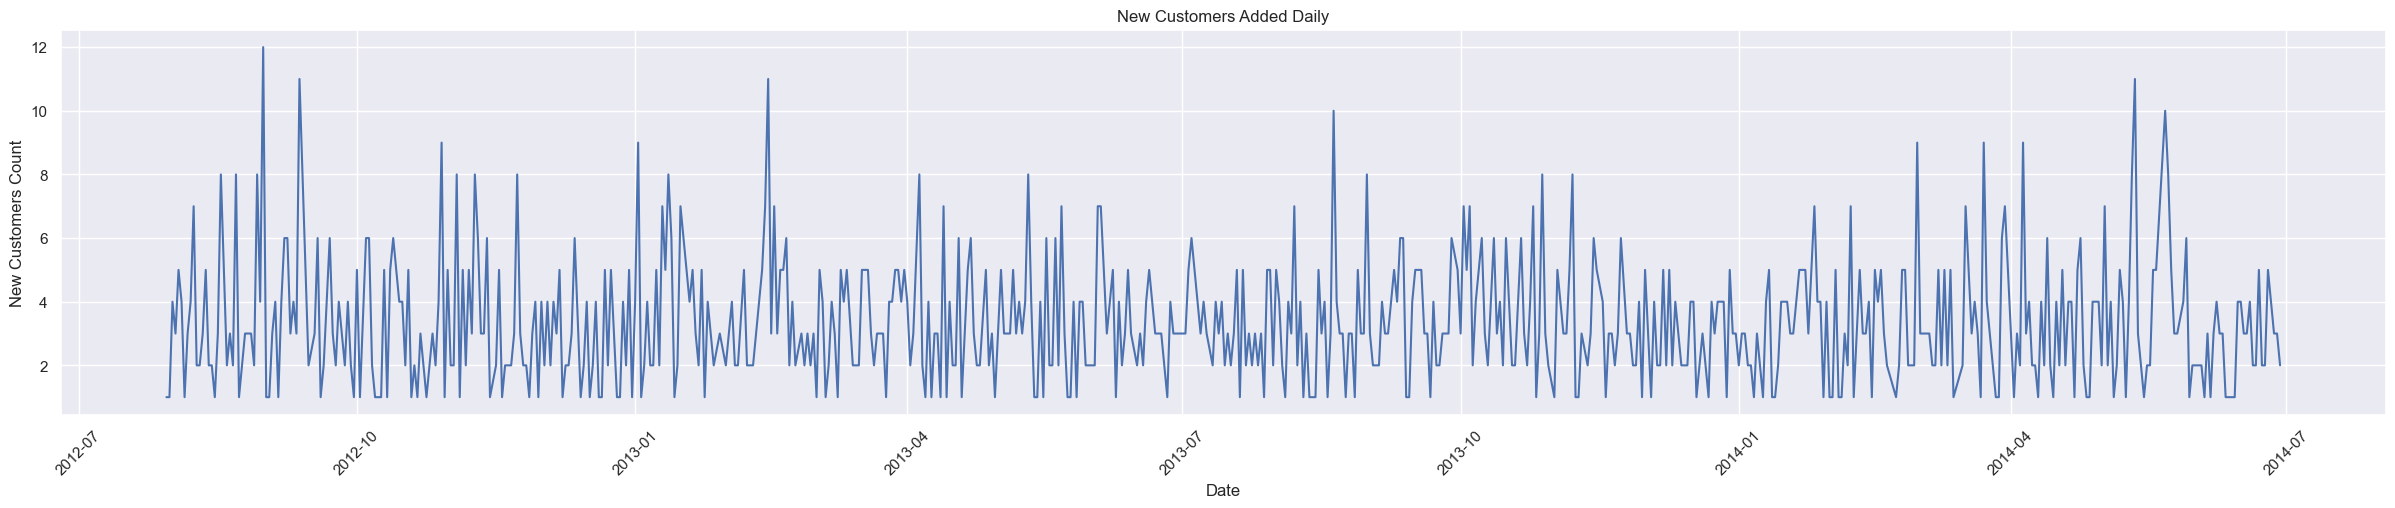

In [101]:
df2 = df.copy()

# Set 'Dt_Customer' column as the DataFrame index
df2.set_index('Dt_Customer', inplace=True)

# Resample the DataFrame to weekly basis and calculate the count of new customers each week
weekly_new_customers = df2['ID'].resample('M').nunique()
# Calculate the count of new customers added each day
daily_new_customers = df2.groupby('Dt_Customer').size()

# Plotting the line chart for daily new customers
plt.figure(figsize=(30, 5))
plt.plot(daily_new_customers.index, daily_new_customers.values, linestyle='-')
plt.xlabel('Date')
plt.ylabel('New Customers Count')
plt.title('New Customers Added Daily')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

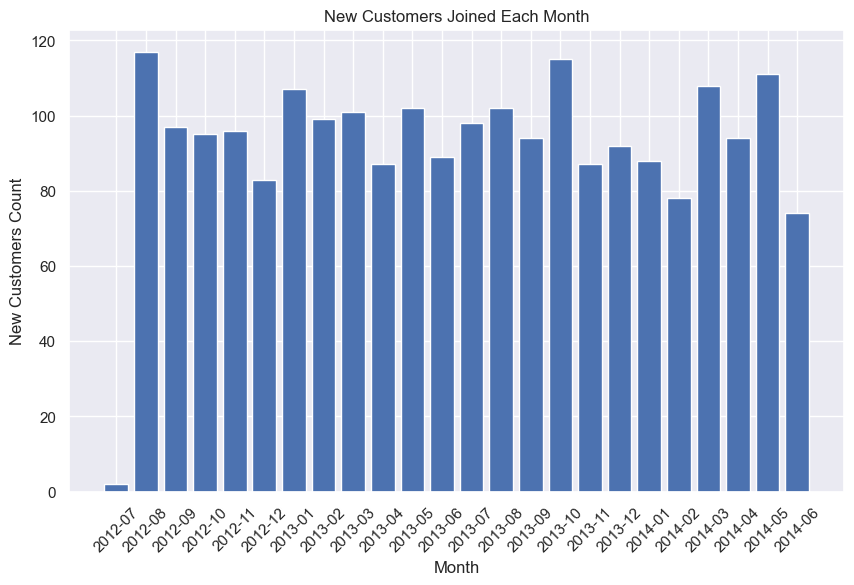

In [105]:
# Extract the month from 'Dt_Customer' column
df['JoinMonth'] = df['Dt_Customer'].dt.to_period('M')

# Group by 'JoinMonth' and count the number of new customers in each month
monthly_new_customers = df.groupby('JoinMonth')['ID'].count()

# Plotting the bar chart for monthly new customers
plt.figure(figsize=(10, 6))
plt.bar(monthly_new_customers.index.astype(str), monthly_new_customers.values)
plt.xlabel('Month')
plt.ylabel('New Customers Count')
plt.title('New Customers Joined Each Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [35]:
customer_data = df[['ID', 'Age','Education','Marital_Status','Children','Family_size','Income','lifespan_months']].copy()
rfm_data = df[['ID','Recency','Frequency','Monetary']].copy()
marketing_data = df[['ID','NumDealsPurchases','PromoAccepted','Responder']].copy()

In [36]:
customer_data.sample(10)

,ID,Age,Education,Marital_Status,Children,Family_size,Income,lifespan_months
1956,8514,38,Postgraduate,Couple,1,3,29478.0,8
596,5252,45,Postgraduate,Single,1,2,23910.0,23
1850,4427,19,Undergraduate,Single,0,1,83257.0,24
140,821,22,Postgraduate,Single,0,1,92859.0,23
208,868,48,Postgraduate,Couple,1,3,44794.0,3
1870,3286,47,Postgraduate,Single,1,2,26642.0,7
2016,7042,31,Postgraduate,Couple,0,2,36790.0,19
955,10031,38,Postgraduate,Couple,2,4,16927.0,20
787,6299,46,Postgraduate,Single,1,2,42564.0,21
1131,606,47,Postgraduate,Single,2,3,25930.0,11


In [37]:
rfm_data.sample(10)

,ID,Recency,Frequency,Monetary
1730,8605,36,5,68
666,8754,25,3,20
420,5929,14,5,48
614,10299,73,22,882
2132,11181,85,0,8
149,4050,65,7,127
363,933,31,3,25
1483,5868,49,4,46
330,2861,79,3,23
748,2281,34,3,28


In [38]:
marketing_data

,ID,NumDealsPurchases,PromoAccepted,Responder
0,5524,3,1,Low
1,2174,2,0,None
2,4141,1,0,None
3,6182,2,0,None
4,5324,5,0,None
...,...,...,...,...
2235,10870,2,0,None
2236,4001,7,1,Low
2237,7270,1,1,Low
2238,8235,2,0,None


# 3 - RFM modeling

From `rfm_data` we need to add score for each values. The method using here will be:
- Define score for `Recency`, `Frequency` and `Monetary` from 1 to 5
- Each score is the evenly separated range for each columns
- Based on `Recency_score` and `Frequency_score`, the results are defined below

|                    	| Frequency_score 	| Recency_score 	|
|--------------------	|:---------------:	|---------------	|
| New Customer       	| 1               	| 1             	|
| Potential Loyalist 	| 2 or 3          	| 1             	|
| Loyal customer     	| 4               	| 1             	|
| About to sleep     	| 1               	| 2 or 3        	|
| Need attention     	| 2 or 3          	| 2 or 3        	|
| Can't lose them    	| 4               	| 2 or 3        	|
| Hibernating        	| 1               	| 4             	|
| Lost customer      	| 2 or 3          	| 4             	|
| Once loyal         	| 4               	| 4             	|

In [39]:
rfm_data

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


In [40]:
# The lower the recency the better
rfm_data['Recency_score'] = pd.qcut(rfm_data['Recency'], q = 4, labels=[4,3,2,1])

# The higher the frequency and monetary the better
rfm_data['Frequency_score'] = pd.qcut(rfm_data['Frequency'], q = 4, labels=[1,2,3,4])
rfm_data['Monetary_score'] = pd.qcut(rfm_data['Monetary'], q = 4, labels=[1,2,3,4])

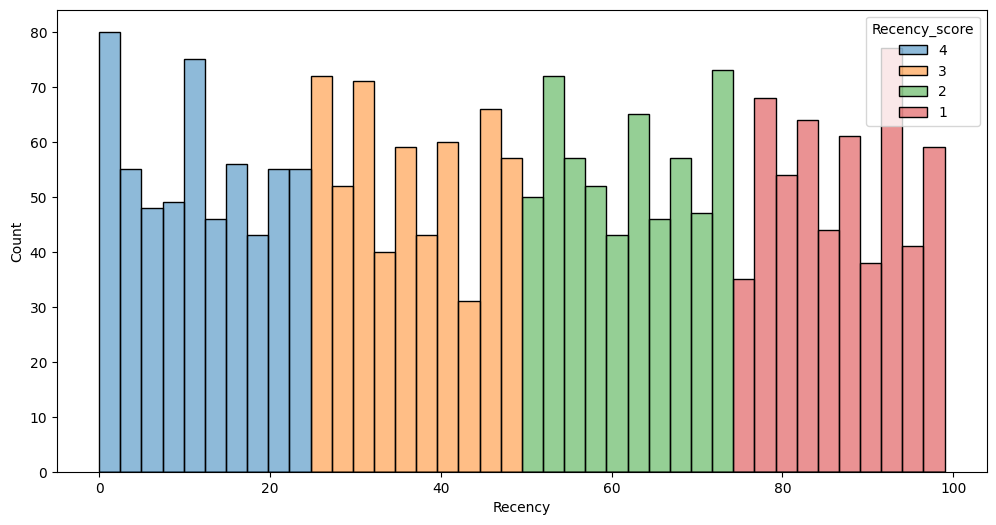

In [41]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(data=rfm_data, x='Recency', bins= 40, hue='Recency_score', multiple='layer')
plt.show()

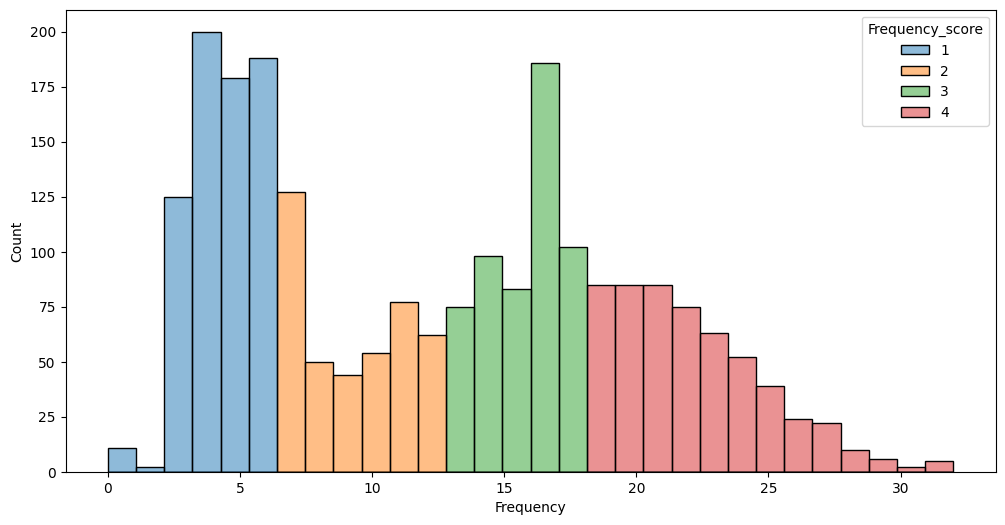

In [42]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(data=rfm_data, x='Frequency', bins=30, hue='Frequency_score')
plt.show()

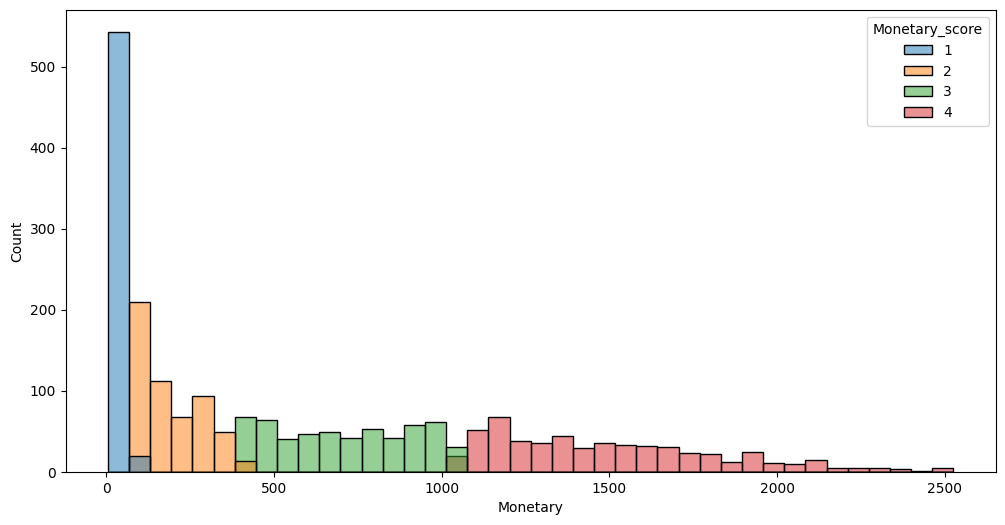

In [43]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.histplot(data=rfm_data, x='Monetary', bins=40, hue='Monetary_score')
plt.show()

In [44]:
# RMF segments
rfm_data['Segment'] = "Non-defined"
rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'] == 1),         'Segment'] = "New Customer"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'] == 1),         'Segment'] = "Potential Loyalist"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'] == 1),         'Segment'] = "Loyal customer"

rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "About to sleep"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "Need attention"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "Can't lose them"

rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'] == 4),         'Segment'] = "Hibernating"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'] == 4),         'Segment'] = "Lost customer"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'] == 4),         'Segment'] = "Once loyal"

In [45]:
# Check mean money spent per Segment
rfm_data.groupby('Segment')['Monetary'].mean().reset_index()

,Segment,Monetary
0,About to sleep,50.456716
1,Can't lose them,1268.379182
2,Hibernating,51.890110
3,Lost customer,630.239496
4,Loyal customer,1285.612676
5,Need attention,661.060904
6,New Customer,53.861702
7,Once loyal,1176.436620
8,Potential Loyalist,623.336493


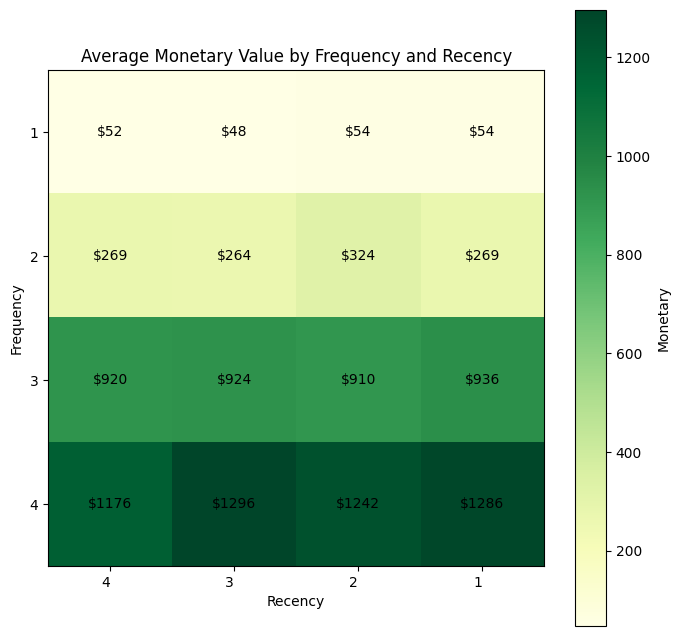

In [46]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='YlGn')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"${pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Average Monetary Value by Frequency and Recency")

plt.show()


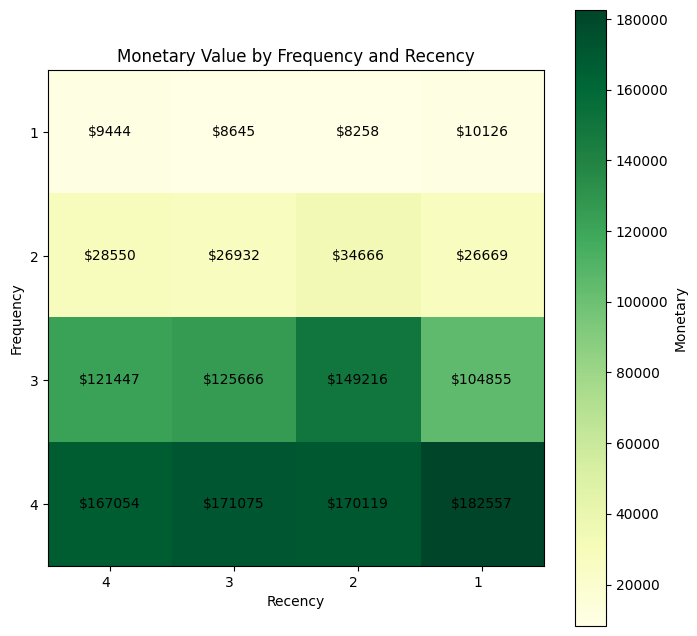

In [47]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc='sum')

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='YlGn')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"${pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Monetary Value by Frequency and Recency")

plt.show()


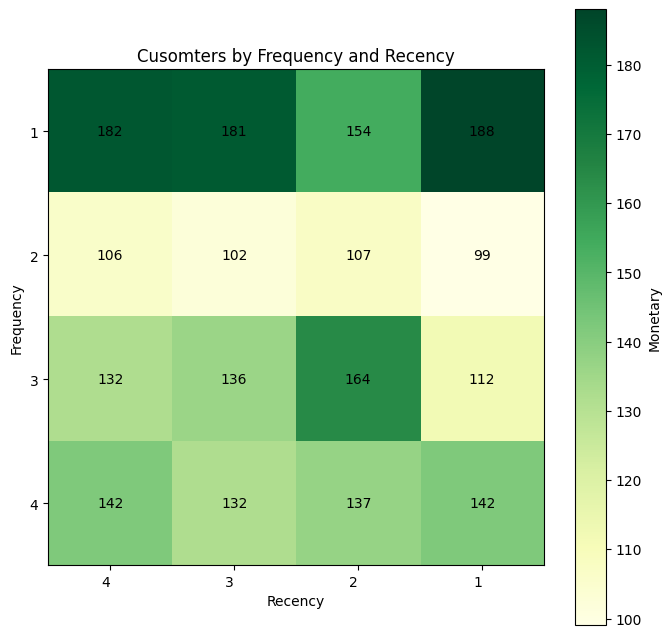

In [48]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc='count')

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='YlGn')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"{pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Cusomters by Frequency and Recency")

plt.show()


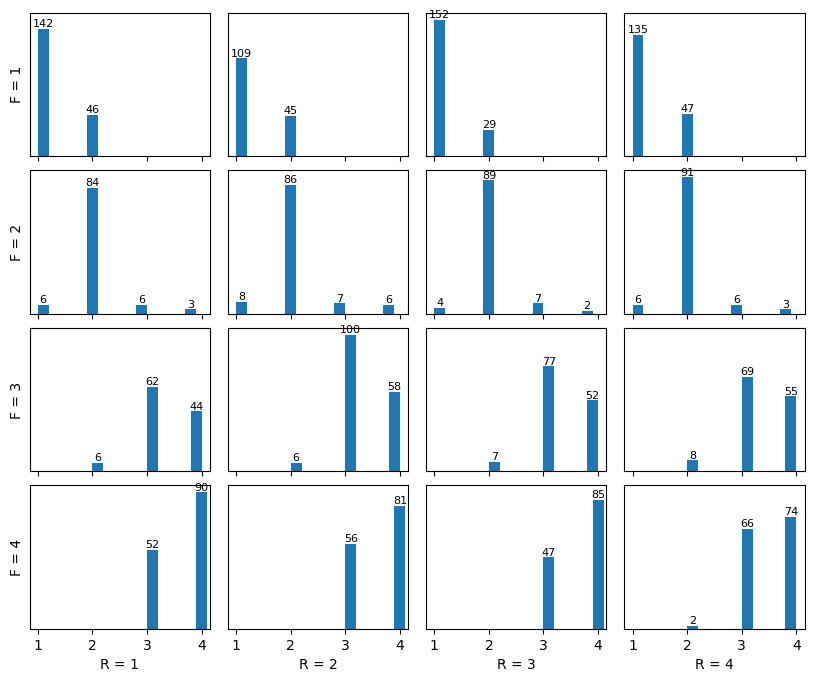

In [49]:
def rfm_bar_chart(rfm_table):
    grouped_data = rfm_table.groupby(['Frequency_score', 'Recency_score'])['Monetary_score'].apply(list).reset_index()

    matrix_size = 4
    matrix = [[[] for _ in range(matrix_size)] for _ in range(matrix_size)]

    # Fill the matrix with the Monetary_score scores for each Frequency_score x Recency_score pair
    for _, row in grouped_data.iterrows():
        freq_idx = min(row['Frequency_score'] - 1, matrix_size - 1)
        rec_idx = min(row['Recency_score'] - 1, matrix_size - 1)
        matrix[freq_idx][rec_idx] = row['Monetary_score']

    # Create the 5x5 matrix of histograms
    _, axes = plt.subplots(matrix_size, matrix_size, figsize=(10, 8), sharex='col', sharey='row')

    for i in range(matrix_size):
        for j in range(matrix_size):
            ax = axes[i, j]
            hist_values, hist_bins, _ = ax.hist(matrix[i][j], width=0.2)

            if i == matrix_size - 1:
                ax.set_xlabel(f"R = {j + 1}")

            if j == 0:
                ax.set_ylabel(f"F = {i + 1}")

            ax.set_yticks([])

            for value, bin in zip(hist_values, hist_bins):
                if value > 0:
                    ax.text(bin + 0.1, value, str(int(value)), ha='center', va='bottom', fontsize=8)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

rfm_bar_chart(rfm_data)


In [50]:
rfm_update_data = rfm_data.merge(df, how ='left', on='ID')
rfm_update_data.head(3)

,ID,Recency_x,Frequency_x,Monetary_x,Recency_score,Frequency_score,Monetary_score,Segment,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency_y,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,lifespan_months,Children,Family_size,Frequency_y,Monetary_y,PromoAccepted,Responder
0,5524,58,22,1617,2,4,4,Can't lose them,1957,Postgraduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,25,0,1,22,1617,1,Low
1,2174,38,4,27,3,1,1,About to sleep,1954,Postgraduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,7,2,3,4,27,0,None
2,4141,26,20,776,3,4,3,Can't lose them,1965,Postgraduate,Couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,13,0,2,20,776,0,None


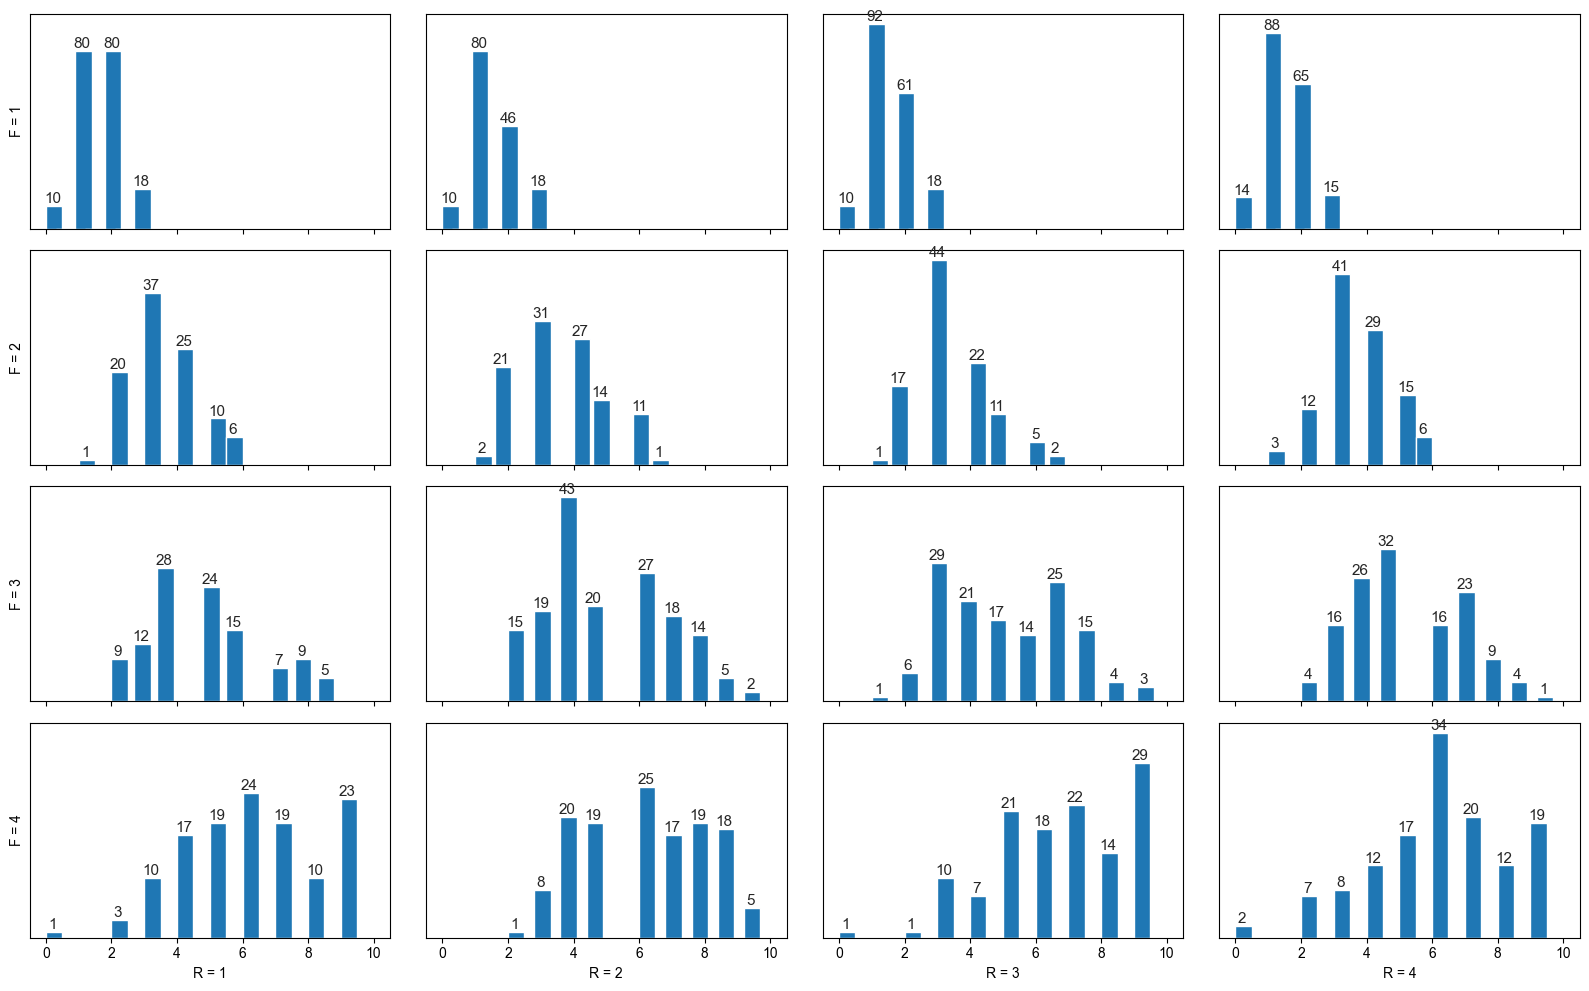

In [51]:
def rfm_bar_chart(rfm_table):
    grouped_data = rfm_table.groupby(['Frequency_score', 'Recency_score'])['NumWebPurchases'].apply(list).reset_index()

    matrix_size = 4
    matrix = [[[] for _ in range(matrix_size)] for _ in range(matrix_size)]

    # Fill the matrix with the NumWebPurchases scores for each Frequency_score x Recency_score pair
    for _, row in grouped_data.iterrows():
        freq_idx = min(row['Frequency_score'] - 1, matrix_size - 1)
        rec_idx = min(row['Recency_score'] - 1, matrix_size - 1)
        matrix[freq_idx][rec_idx] = row['NumWebPurchases']

    # Create the 5x5 matrix of histograms
    _, axes = plt.subplots(matrix_size, matrix_size, figsize=(20, 12), sharex='col', sharey='row')
    sns.set(style="dark")

    for i in range(matrix_size):
        for j in range(matrix_size):
            ax = axes[i, j]
            hist_values, hist_bins, _ = ax.hist(matrix[i][j], width=0.5)

            if i == matrix_size - 1:
                ax.set_xlabel(f"R = {j + 1}")

            if j == 0:
                ax.set_ylabel(f"F = {i + 1}")

            ax.set_yticks([])

            for value, bin in zip(hist_values, hist_bins):
                if value > 0:
                    ax.text(bin + 0.2, value, str(int(value)), ha='center', va='bottom', fontsize=11)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

rfm_bar_chart(rfm_update_data[rfm_update_data['NumWebPurchases'] <= 10])


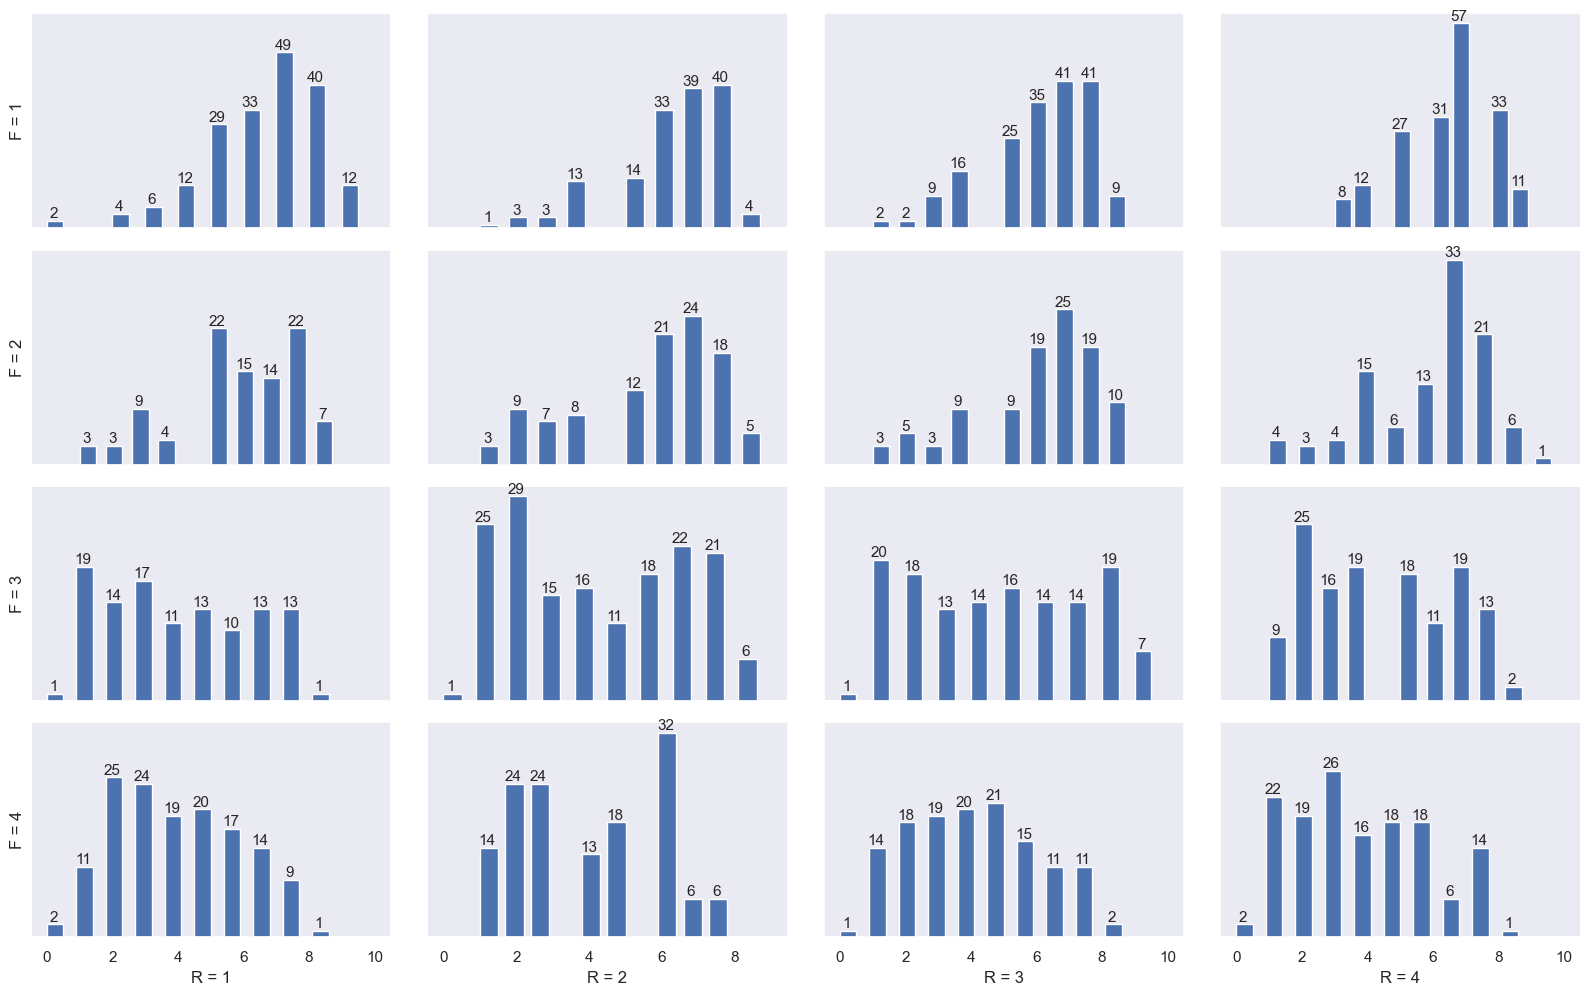

In [52]:
def rfm_bar_chart(rfm_table):
    grouped_data = rfm_table.groupby(['Frequency_score', 'Recency_score'])['NumWebVisitsMonth'].apply(list).reset_index()

    matrix_size = 4
    matrix = [[[] for _ in range(matrix_size)] for _ in range(matrix_size)]

    # Fill the matrix with the NumWebVisitsMonth scores for each Frequency_score x Recency_score pair
    for _, row in grouped_data.iterrows():
        freq_idx = min(row['Frequency_score'] - 1, matrix_size - 1)
        rec_idx = min(row['Recency_score'] - 1, matrix_size - 1)
        matrix[freq_idx][rec_idx] = row['NumWebVisitsMonth']

    # Create the 5x5 matrix of histograms
    _, axes = plt.subplots(matrix_size, matrix_size, figsize=(20, 12), sharex='col', sharey='row')
    sns.set(style="dark")

    for i in range(matrix_size):
        for j in range(matrix_size):
            ax = axes[i, j]
            hist_values, hist_bins, _ = ax.hist(matrix[i][j], width=0.5)

            if i == matrix_size - 1:
                ax.set_xlabel(f"R = {j + 1}")

            if j == 0:
                ax.set_ylabel(f"F = {i + 1}")

            ax.set_yticks([])

            for value, bin in zip(hist_values, hist_bins):
                if value > 0:
                    ax.text(bin + 0.2, value, str(int(value)), ha='center', va='bottom', fontsize=11)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

rfm_bar_chart(rfm_update_data[rfm_update_data['NumWebVisitsMonth'] <= 10])


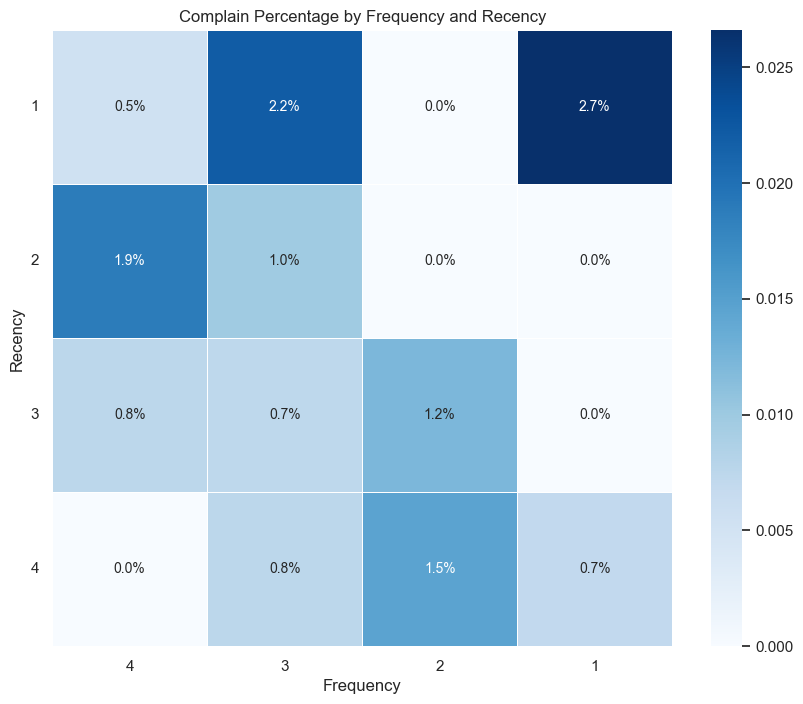

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def rfm_heatmap(rfm_table):
    grouped_data = rfm_table.groupby(['Frequency_score', 'Recency_score'])['Complain'].mean().unstack()
    matrix_size = 4

    _, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(grouped_data, annot=True, cmap="Blues", fmt='.1%', annot_kws={'fontsize': 10}, linewidths=0.5, ax=ax)

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency')

    ax.set_xticklabels(range(4, 0, -1), rotation=0)
    ax.set_yticklabels(range(1, 5), rotation=0)

    ax.set_title('Complain Percentage by Frequency and Recency')

    plt.show()

rfm_heatmap(rfm_update_data)

In [66]:
grouped_data = rfm_update_data.groupby(['Frequency_score','Recency_score'])['Complain'].mean().unstack()
grouped_data

Recency_score,4,3,2,1
Frequency_score,,,,
1,0.005495,0.022099,0.000000,0.026596
2,0.018868,0.009804,0.000000,0.000000
3,0.007576,0.007353,0.012195,0.000000
4,0.000000,0.007576,0.014599,0.007042


In [68]:
reversed_columns = grouped_data.iloc[:, ::-1]
reversed_columns

Recency_score,1,2,3,4
Frequency_score,,,,
1,0.026596,0.000000,0.022099,0.005495
2,0.000000,0.000000,0.009804,0.018868
3,0.000000,0.012195,0.007353,0.007576
4,0.007042,0.014599,0.007576,0.000000


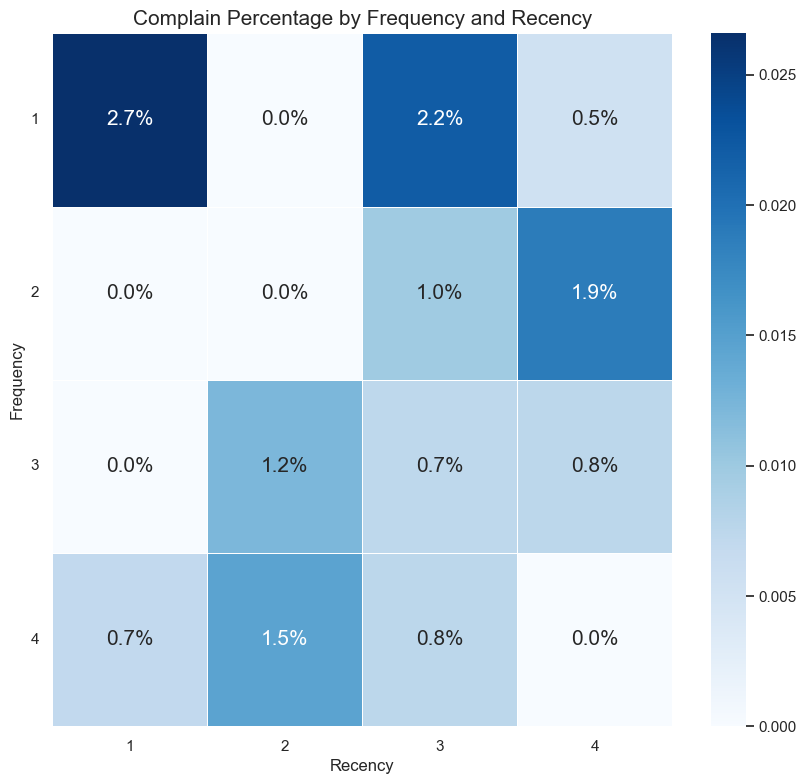

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

def rfm_heatmap(rfm_table):
    grouped_data = rfm_update_data.groupby(['Frequency_score','Recency_score'])['Complain'].mean().unstack().iloc[:, ::-1]
    matrix_size = 4

    _, ax = plt.subplots(figsize=(10, 9))

    sns.heatmap(grouped_data, annot=True, cmap="Blues", fmt='.1%', annot_kws={'fontsize': 15}, linewidths=0.5, ax=ax)

    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')

    # Reverse the order of x-axis tick labels (Recency scores)
    ax.set_xticklabels(range(1, 5), rotation=0)
    ax.set_yticklabels(range(1, 5), rotation=0)

    ax.set_title('Complain Percentage by Frequency and Recency', fontsize=15)

    plt.show()

rfm_heatmap(rfm_update_data)


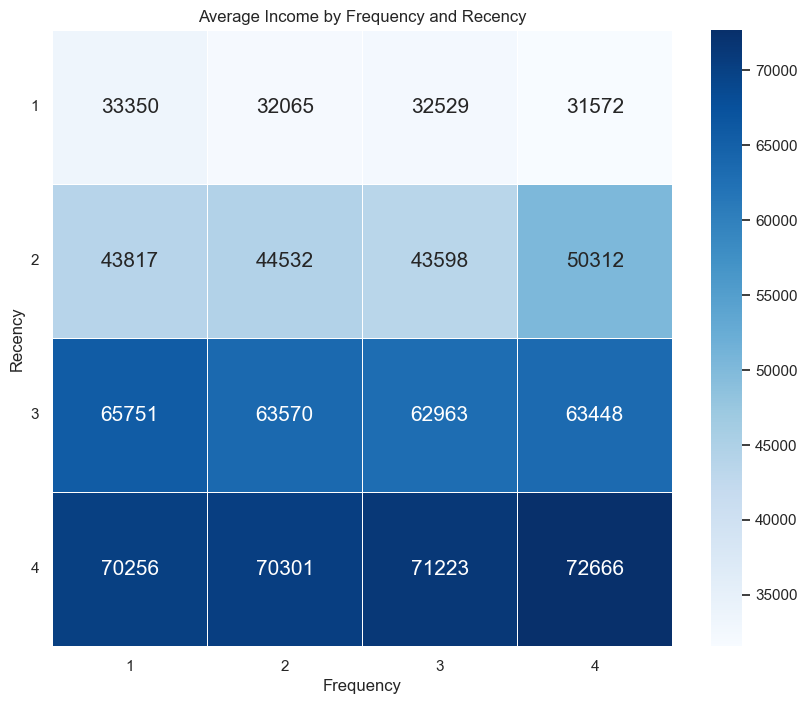

In [95]:
def rfm_heatmap(rfm_table):
    grouped_data = rfm_table.groupby(['Frequency_score', 'Recency_score'])['Income'].mean().unstack()
    grouped_data = grouped_data.iloc[::, ::-1]
    matrix_size = 4

    _, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(grouped_data, annot=True, cmap="Blues", fmt='.0f', annot_kws={'fontsize': 15}, linewidths=0.5, ax=ax)

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency')

    ax.set_xticklabels(range(1, 5), rotation=0)
    ax.set_yticklabels(range(1, 5), rotation=0)

    ax.set_title('Average Income by Frequency and Recency')

    plt.show()

rfm_heatmap(rfm_update_data)


In [97]:
grouped_data = rfm_update_data.groupby(['Frequency_score', 'Recency_score'])['Income'].mean().unstack()
grouped_data

Recency_score,4,3,2,1
Frequency_score,,,,
1,31572.065934,32529.099448,32064.623377,33349.622340
2,50311.990566,43598.294118,44531.822430,43816.666667
3,63448.227273,62963.066176,63569.756098,65751.437500
4,72666.021127,71223.409091,70301.175182,70256.500000


# 4 - Export to csv

In [55]:
customer_data.to_csv("final_customer_data.csv", index=False)
rfm_data.to_csv("final_rfm_data.csv", index=False)
marketing_data.to_csv("final_marketing_data.csv", index=False)